In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.externals import joblib
from matplotlib import pyplot as plt

In [ ]:
target = 'adult'
#target = '20news'
#target = 'mnist'

#model = 'logreg'
model = 'dnn'

In [2]:
tau = []
jaccard = []
for seed in range(100):
#for seed in range(50):
    res1 = joblib.load('./%s_%s/infl_true%03d.dat' % (target, model, seed))
    res2 = joblib.load('./%s_%s/infl_sgd%03d.dat' % (target, model, seed))
    res3 = joblib.load('./%s_%s/infl_icml%03d.dat' % (target, model, seed))
    if np.sum(np.isnan(res3)) > 0:
        print(seed)
        continue
    tau.append((stats.kendalltau(res1, res2)[0], stats.kendalltau(res1, res3)[0]))
    idx1 = np.argsort(res1)
    idx1 = np.r_[idx1[:10], idx1[-10:]]
    idx2 = np.argsort(res2)
    idx2 = np.r_[idx2[:10], idx2[-10:]]
    idx3 = np.argsort(res3)
    idx3 = np.r_[idx3[:10], idx3[-10:]]
    jaccard.append((np.intersect1d(idx1, idx2).size / np.union1d(idx1, idx2).size, np.intersect1d(idx1, idx3).size / np.union1d(idx1, idx3).size))
print('Kendall tau', np.mean(tau, axis=0), np.std(tau, axis=0))
print('Jaccard index', np.mean(jaccard, axis=0), np.std(jaccard, axis=0))

Kendall tau [0.75398681 0.5983162  0.53900894] [0.10495675 0.14203233 0.12354166]
Jaccard index [0.58892582 0.40386298 0.31815625] [0.15925208 0.14611886 0.11264888]


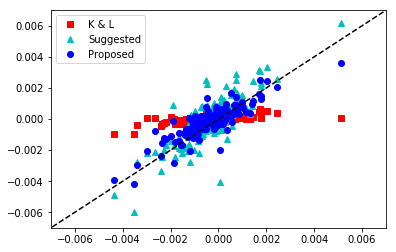

In [13]:
seed = 0

res1 = joblib.load('./%s_%s/infl_true%03d.dat' % (target, model, seed))
res2 = joblib.load('./%s_%s/infl_sgd%03d.dat' % (target, model, seed))
res3 = joblib.load('./%s_%s/infl_icml%03d.dat' % (target, model, seed))

plt.plot(res1, res3, 'rs')
plt.plot(res1, res2, 'bo')
plt.plot([-1, 1], [-1, 1], 'k--')
#plt.xlim([-0.03, 0.03])
#plt.ylim([-0.03, 0.03])
#plt.axis('square')
plt.xlim([-0.007, 0.007])
plt.ylim([-0.007, 0.007])
plt.legend(['K & L', 'Proposed'])
plt.show()